# Practical session 3

A non-linear relationship is one that cannot be described by a linear equation (i.e. y = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n). Most of the relationships that we will try to model are indeed non-linear. On top of that, once we get past three dimensions, we can't visually verify if a relationship is linear or not. So, how do we create a model when we don't know a family of models that we can use? Even more, how do we create a model when we can't observe the data?

To answer the above, scientists and researchers can spend a long time doing complex visualisations and trying and validating different families of models. However, when there is enough data, there is another answer: Machine Learning.

Machine Learning (ML) is a discipline of science where we can find families of models that cover an incredibly large space of functions. These models can approximate nearly any function that we can imagine, linear and non-linear. However, this comes at a cost. In order to land on the correct model, from such a huge space to search, we need unbelievably large amounts of data.

Machine Learning models achieve such high capacity using a simple concept: a combination of simple functions can be used to create a complex function; the more simple functions you combine, the more complex functions you can create. We will start this session with the most simple (yet one of the most powerful) machine learning models: the Multi-Layer Perceptron (MLP).

A **perceptron** is a very simple way of defining models. It consists of a linear combination of all the inputs and a non-linear function applied to that combination. Mathematically it is defined as follows. Assume you have N inputs (x_1, x_2, ..., x_N) and one output (y):

z = a_0 + a_1x_1 + a_2x_2 + ... a_NxN

y = f(z)

Where a_0 is called the "bias term", all the other a_i are called "weights" and f() is called an "activation function" . You can refer to the image in the presentation for a visual representation of the perceptron. To find the best model for the data that we have we follow the exact same _gradient descent_ procedure that we saw in the previous session.

Simple as it seems, the perceptron is the building block for some of the most powerful deep learning models. In particular the **multi-layer perceptron** (also known as feed-forward network, fully-connected network, artificial neural network,...) is a combination of perceptrons that can be made _wide_ by adding parallel perceptrons or _deep_ by chaining perceptrons one after the other. The MLP has been theoretically proven to be able to approximate any continuous non-linear function between the inputs and the outputs; with the caveat that this only holds when you have infinite examples.

Let's not worry about that for the moment. Rather, let's get comfortable with the MLP and how width and depth affect our results.

## Practical exercise 1: A non-linear computer language

For this exercise we are going to try and predict what a computer is trying to tell us! Albeit a very simple computer. This computer only accepts two inputs, each being a number between 0 and 1. The response of the computer will be either 0 or 1, depending on the inputs.

Our mission is to try to create a model for the language of this computer. Because we have time to spare (of course we do, we are scientists!) we have given the computer 25,000 combinations of inputs and recorded its response. You can see the inputs and the responses by running the cell below. Do that now before continuing to read.

As you can see, the relationship between the two inputs and the outputs is non-linear. If we did some research on computer language we could probably figure out what is this function. But we are feeling a bit lazy, so we are going to train a multi-layer perceptron to find us a good _model_ for the language that this computer uses.

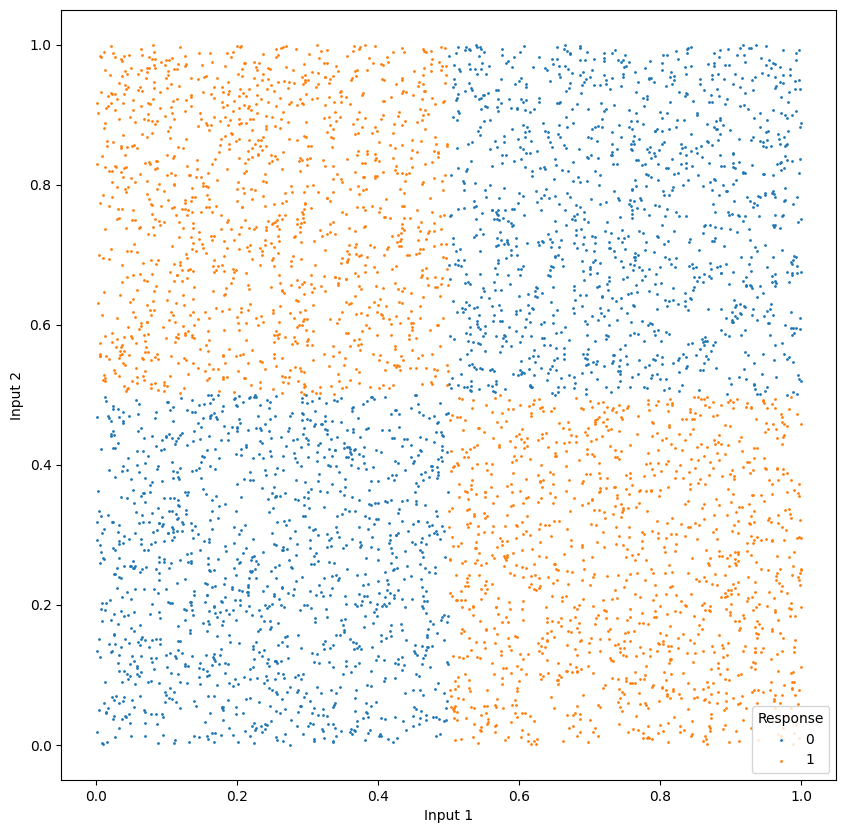

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("computer_responses.csv")
input_1 = data['x'].to_numpy()
input_2 = data['y'].to_numpy()
response = data['z'].to_numpy()

plt.figure(figsize=(10,10))
plt.scatter(input_1[response==0], input_2[response==0], marker="o", s=1, label="0")
plt.scatter(input_1[response==1], input_2[response==1], marker="o", s=1, label="1")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend(title="Response")


In the cell below you can experiment with the MLP. Your mission is to try to get its accuracy as high as possible. For simplicity, we are using an MLP that has constant depth across all layers, but if you had more time you could customise the depth of each layer. You have three parameters to play with:

1. DEPTH - How many layers the MLP has
2. WIDTH - How many perceptrons there are in each layer of the MLP
3. NUM_EPOCHS - How many times to go over the entire dataset searching for the right parameters
4. ACTIVATION - Which non-linear function to use in the layers. For now we don't care what these functions are, but how they can affect our accuracy.

When you run the cell you will be able to see the progress at each epoch and a plot at the end that shows you the entire training regime.

Epoch 1/10


2022-10-25 11:49:25.481207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 - 1s - loss: 0.6935 - accuracy: 0.5134 - 1s/epoch - 7ms/step
Epoch 2/10
157/157 - 1s - loss: 0.6925 - accuracy: 0.5130 - 662ms/epoch - 4ms/step
Epoch 3/10
157/157 - 1s - loss: 0.6795 - accuracy: 0.5144 - 654ms/epoch - 4ms/step
Epoch 4/10
157/157 - 1s - loss: 0.6307 - accuracy: 0.6546 - 672ms/epoch - 4ms/step
Epoch 5/10
157/157 - 1s - loss: 0.6048 - accuracy: 0.6566 - 699ms/epoch - 4ms/step
Epoch 6/10
157/157 - 1s - loss: 0.5943 - accuracy: 0.6610 - 723ms/epoch - 5ms/step
Epoch 7/10
157/157 - 1s - loss: 0.5900 - accuracy: 0.6602 - 662ms/epoch - 4ms/step
Epoch 8/10
157/157 - 1s - loss: 0.5869 - accuracy: 0.6612 - 659ms/epoch - 4ms/step
Epoch 9/10
157/157 - 1s - loss: 0.5853 - accuracy: 0.6618 - 652ms/epoch - 4ms/step
Epoch 10/10
157/157 - 1s - loss: 0.5836 - accuracy: 0.6592 - 655ms/epoch - 4ms/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(Non

Text(0, 0.5, 'Accuracy (%)')

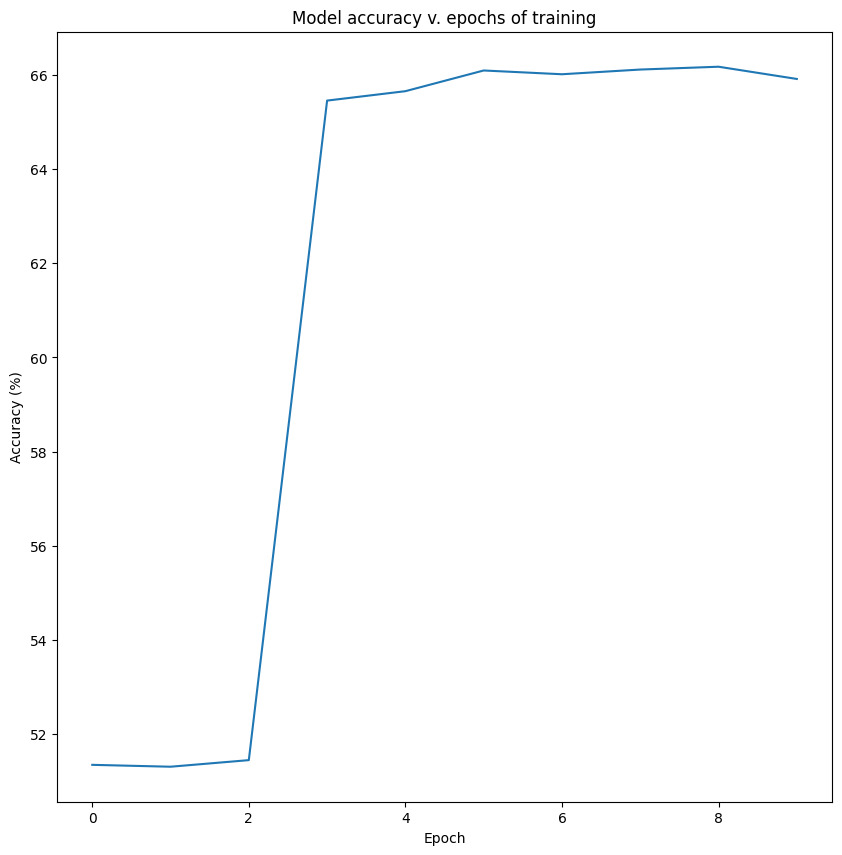

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf

## -- Choose how many times you would like the model to see the data -- ##
NUM_EPOCHS = 10
DEPTH = 2
WIDTH = 2
ACTIVATION = 'sigmoid' # You can change this between sigmoid, relu and tanh

## -- DO NOT TOUCH -- ##
input_ = tf.keras.Input(shape=2)
output = input_
for _ in range(DEPTH):
    output = tf.keras.layers.Dense(units=WIDTH, activation=ACTIVATION)(output)

output = tf.keras.layers.Dense(units=1, activation='sigmoid')(output)
model = tf.keras.Model(input_, [output])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=["accuracy"],
)
history = model.fit(
    x=np.concatenate([np.atleast_2d(input_1), np.atleast_2d(input_2)], axis=0).T,
    y=response,
    epochs=NUM_EPOCHS,
    batch_size=32,
    verbose=2,
)

print(model.summary())

plt.figure(figsize=(10,10))
plt.plot(np.arange(NUM_EPOCHS), np.array(history.history['accuracy']) * 100)
plt.title("Model accuracy v. epochs of training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
## -- DO NOT TOUCH -- ##


## Practical exercise 2: how much does my house cost?

Next, we are going to use the same type of architecture for a different problem. We are going to try and predict house prices from a series of input features!

We will be using the [Boston housing dataset](http://lib.stat.cmu.edu/datasets/boston) for it.

**DISCLAIMER:** The Boston housing dataset is no longer considered a standard for the ML community. In fact, it is a very controversial dataset. The bonus question at the end explores this a bit further!

The Boston housing dataset contains 13 features of different neighbourhoods in Boston and as a target the median house value of that neighbourhood in thousands of USD. It was one of the first successful applications of machine learning, where it was really hard to get good estimates using more traditional modelling methods.

The instructions are the same as before.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## -- Choose how many times you would like the model to see the data -- ##
NUM_EPOCHS = 10
DEPTH = 1
WIDTH = 1
ACTIVATION = 'sigmoid' # You can change this between sigmoid, relu and tanh

## -- DO NOT TOUCH -- ##
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

input_ = tf.keras.Input(shape=x_train.shape[1])
output = tf.keras.layers.Dense(units=WIDTH, activation=ACTIVATION)(input_)
for _ in range(DEPTH):
    output = tf.keras.layers.Dense(units=WIDTH, activation=ACTIVATION)(output)

output = tf.keras.layers.Dense(units=1, activation='relu')(output)
model = tf.keras.Model(input_, [output])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=["mae"]
)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=NUM_EPOCHS,
    batch_size=32,
    verbose=2,
)

test_metrics = model.evaluate(
    x=x_test,
    y=y_test,
)

plt.figure(figsize=(10,10))
plt.plot(np.arange(NUM_EPOCHS), np.array(history.history['loss']) * 100)
plt.title(
    "Model mean squared error v. epochs of training\n"
    f"Train MAE={history.history['mae'][-1]}, Test MAE={test_metrics[1]}"
)
plt.xlabel("Epoch")
plt.ylabel("Mean squared error")


## -- DO NOT TOUCH -- ##


## Bonus question: controversy in machine learning

The Boston housing dataset highlighted one of the biggest bias (and misinterpretations) in machine learning. Can you do a quick research and find out what is that misinterpretation? If you found something like this in a dataset, how would you handle it? Do you think that something like this could happen to nPlan?

Hint: is there information that you can't give your model, but that is important for the conclusions that you derive from it?